In [ ]:
pip install opencv-python==4.5.5.64

     |████████████████████████████████| 60.5 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

%matplotlib inline 
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15, 12)

!gdown --id '1PEg5BqSGlfMcgfqrGRzGblo4WhxXY3-Z' --output 1.jpg
img1 = cv2.imread('1.jpg')
img1 = cv2.resize(img1, (1200, 900))

!gdown --id '1FDE8ukopITPkQc1HQrGG4BrzHZLE1bEn' --output 2.jpg
img2 = cv2.imread('2.jpg')
img2 = cv2.resize(img2, (1200, 900))

cv2_imshow(img1)
cv2_imshow(img2)

Output hidden; open in https://colab.research.google.com to view.

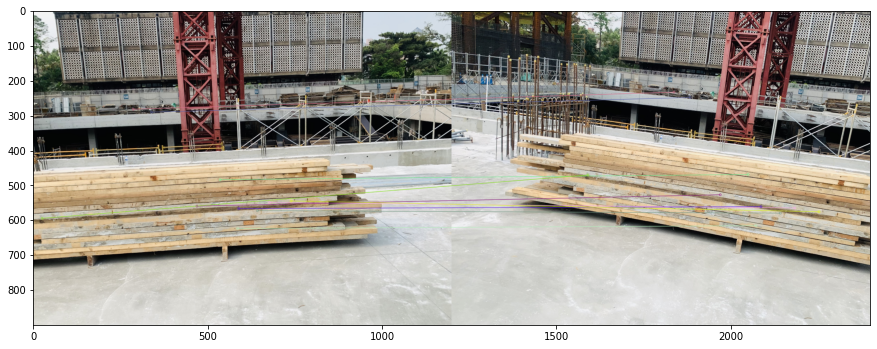

In [4]:
import cv2
# create sift algorithm object
# Do not use the xfeatures2d one
sift=cv2.SIFT_create()
# find the keypoints and compute the descriptors with sift

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

# create BFMatcher object: this is a Brute Force matching object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)



# Match descriptors.
matches = bf.match(descriptors_1,descriptors_2)



# Sort them by distance between matches in feature space - so the best matches are first.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:10], img1, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the image, remember to notice the color channel
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB));
